In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# Generate a dataset
data = {
    'ds': pd.date_range(start='2024-01-01', periods=180, freq='D'),
    'y': [x + 5 * np.sin(2 * np.pi * x / 365) + np.random.normal(0, 2)\
          for x in range(180)]
}
df = pd.DataFrame(data)
df.head()

,ds,y
0,2024-01-01,0.665621
1,2024-01-02,0.291010
2,2024-01-03,4.325741
3,2024-01-04,0.915016
4,2024-01-05,4.929449


In [3]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

08:44:37 - cmdstanpy - INFO - Chain [1] start processing
08:44:37 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
# A future dataframe
future = model.make_future_dataframe(periods=30)

In [5]:
# Forecast the future data
forecast = model.predict(future)

/Users/edupmon/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/edupmon/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


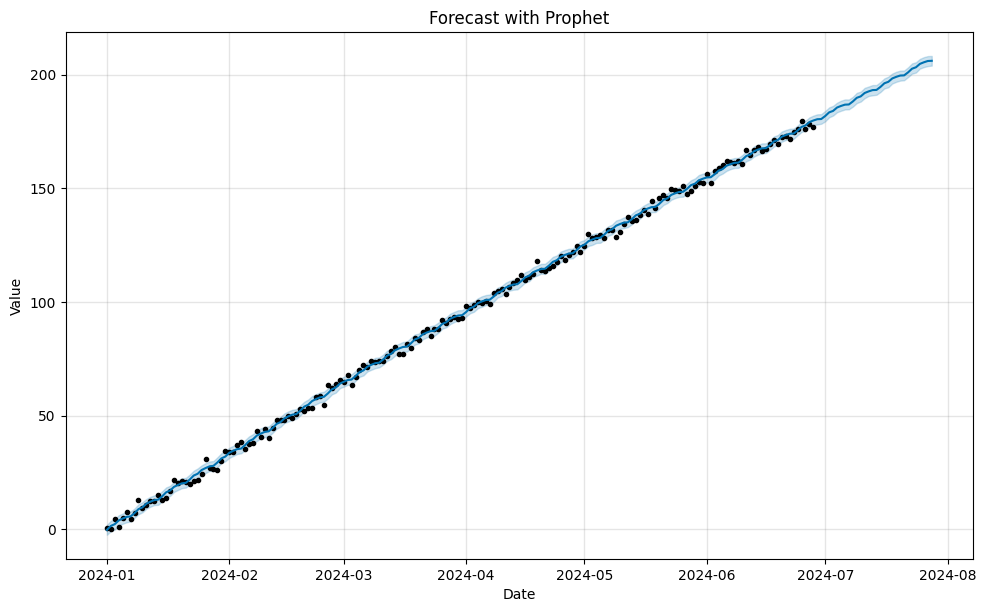

In [6]:
# Visualizing the forecast
model.plot(forecast)
plt.title('Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

/Users/edupmon/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


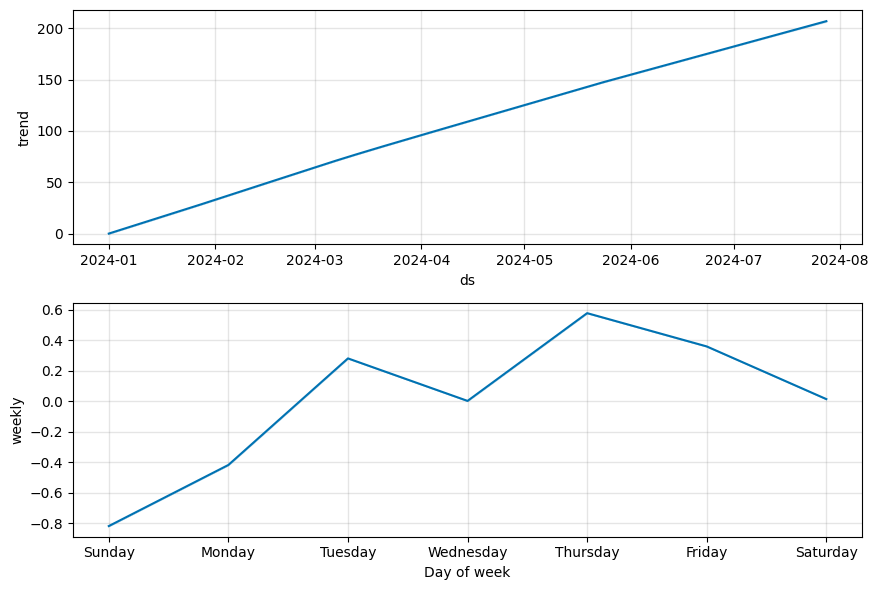

In [7]:
# Forecast components
model.plot_components(forecast)
plt.show()